# Classifying the message as spam or ham

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import sklearn

In [2]:
df=pd.read_csv('C:\\Users\\saipr\\Downloads\\spam.csv')
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [3]:
df.shape

(5572, 2)

In [4]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
df.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


In [6]:
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


# Converting into numerical variables by using Label Encoder


In [8]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Category']=le.fit_transform(df['Category'])


In [9]:
df['Category']

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: Category, Length: 5572, dtype: int32

In [10]:
df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


# feature and target variables

In [11]:
feature=df['Message']
target=df['Category']

# Text Processing

In [12]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

#Converting textual data into numerical form
countvector=CountVectorizer()
x_train=countvector.fit_transform(feature)
print(x_train.toarray())


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [13]:
print(x_train.shape)

(5572, 8709)


In [14]:
tfidf_transformer = TfidfTransformer()
x_train_tfidf = tfidf_transformer.fit_transform(x_train)
print(x_train_tfidf.shape)

(5572, 8709)


# Testing and training of data

In [15]:
from sklearn.model_selection import train_test_split 

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x_train_tfidf,target,test_size=0.25,random_state=50)

In [17]:
print(x_train.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [18]:
print(x_test.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [19]:
print('Shape of x_train is:',x_train.shape)
print('Shape of x_test is:',x_test.shape)
print('Shape of y_train is:',y_train.shape)
print('Shape of y_test is:',y_test.shape)

Shape of x_train is: (4179, 8709)
Shape of x_test is: (1393, 8709)
Shape of y_train is: (4179,)
Shape of y_test is: (1393,)


# Creating model and fitting the data

In [20]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(x_train, y_train)

MultinomialNB()

#  Predicting

In [21]:
y_pred=mnb.predict(x_test)
print(y_pred)

[1 0 0 ... 0 0 0]


#  Confusion matrix and accuracy score

In [22]:
from sklearn.metrics import confusion_matrix, accuracy_score


In [23]:
cm=confusion_matrix(y_test,y_pred)


In [24]:
print(cm)

[[1217    0]
 [  54  122]]


In [25]:
acc=accuracy_score(y_test,y_pred)

In [26]:
print(acc*100)

96.12347451543431


# Heatmap

In [27]:
import seaborn as sns

<AxesSubplot:>

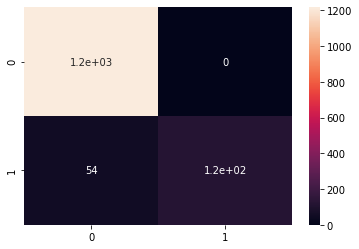

In [28]:
sns.heatmap(cm,annot=True)